## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data=pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
complete_data.head()
                


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
complete_data['Mouse ID'].value_counts()

g989    13
b879    10
p438    10
e584    10
i901    10
        ..
x336     1
b447     1
o848     1
u153     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#From: https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

duplicate_rows = complete_data[complete_data.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate Rows based on Mouse ID and Timepoint columns are:", duplicate_rows, sep='\n')

Duplicate Rows based on Mouse ID and Timepoint columns are:
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#SEE ABOVE


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_to_drop=complete_data[complete_data['Mouse ID'] == 'g989'].index
clean_complete_data=complete_data.drop(mouse_to_drop)


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_complete_data['Mouse ID'].value_counts()

b879    10
s508    10
w422    10
v991    10
w575    10
        ..
u153     1
o848     1
b447     1
x336     1
t573     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
drug_regs=clean_complete_data['Drug Regimen'].unique()
drug_regs


array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
med_grouped_cc_df=clean_complete_data.groupby(['Drug Regimen'])
#med_grouped_cc_df.count()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
avg_tumorvol=med_grouped_cc_df['Tumor Volume (mm3)'].mean() 
med_tumorvol=med_grouped_cc_df['Tumor Volume (mm3)'].median()
var_tumorvol=med_grouped_cc_df['Tumor Volume (mm3)'].var()
std_tumorvol=med_grouped_cc_df['Tumor Volume (mm3)'].std()
sem_tumorvol=med_grouped_cc_df['Tumor Volume (mm3)'].sem()



# Assemble the resulting series into a single summary dataframe.
summary_grouped_df=pd.DataFrame({'Mean Tumor Vol.': avg_tumorvol,
                                'Median Tumor Vol.': med_tumorvol,
                                'Tumor Vol. Variance': var_tumorvol,
                                'Tumor Vol. Std. Dev.': std_tumorvol,
                                'Tumor Vol. SEM': sem_tumorvol})
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_grouped_df

,Mean Tumor Vol.,Median Tumor Vol.,Tumor Vol. Variance,Tumor Vol. Std. Dev.,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:


# Using the aggregation method, produce the same summary statistics in a single line
#From https://stackoverflow.com/questions/19078325/naming-returned-columns-in-pandas-aggregate-function
df=clean_complete_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std','sem']})

#WORKS THIS FAR!!!    

# Assemble the resulting series into a single summary dataframe.
aggregate_summary=pd.DataFrame(df)
aggregate_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
clean_complete_data['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Unique Mice/Regimen')

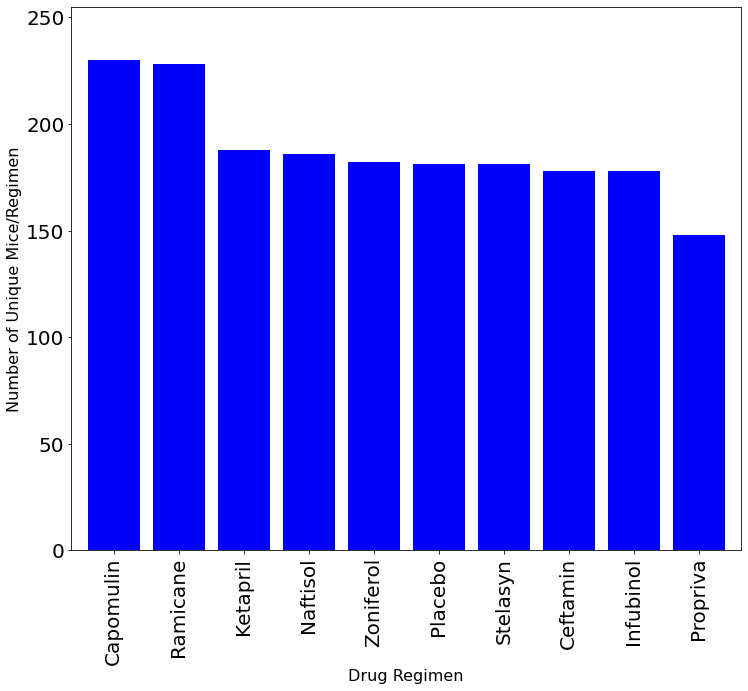

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_measure=clean_complete_data['Drug Regimen'].value_counts()
num_sorted=num_measure.sort_values( ascending=False)


numsort_df=pd.DataFrame(num_sorted)
numsort_df=numsort_df.rename(columns={"Drug Regimen":"Count"})

mr=numsort_df.plot(kind='bar', figsize=(12,10), legend=False, fontsize=20, color='b',ylim=(0, max(num_sorted)+25),width=.8)
mr.set_xlabel("Drug Regimen")
mr.set_ylabel("Number of Unique Mice/Regimen")


Text(0, 0.5, 'Number of Unique Mice/Regimen')

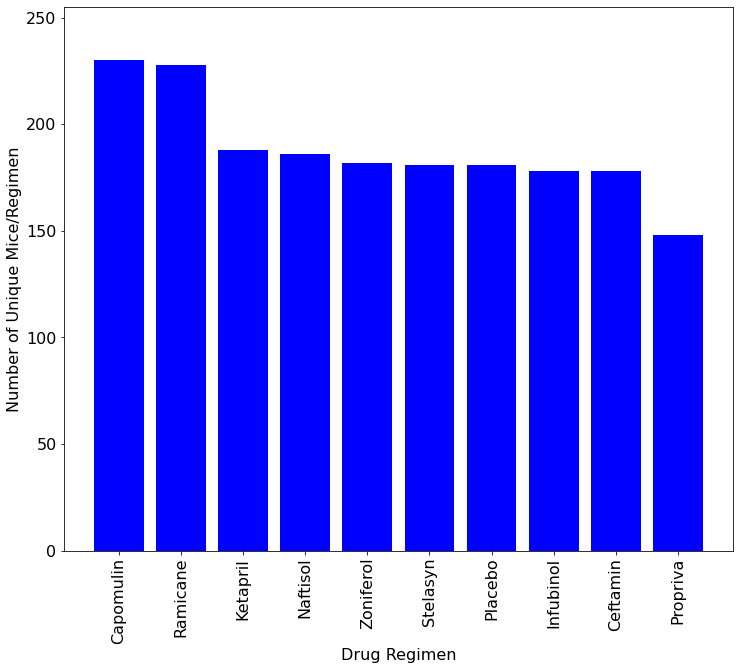

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
dnames=['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']

x_axis=range(len(drug_regs))
tick_locations=[value for value in x_axis]
plt.figure(figsize= (12,10))
plt.rcParams['font.size']='16'
plt.bar(x_axis, num_sorted, color='b', alpha=1.0, align="center")
plt.xticks(tick_locations, dnames, rotation="vertical")

plt.ylim(0, max(num_sorted)+25)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice/Regimen')


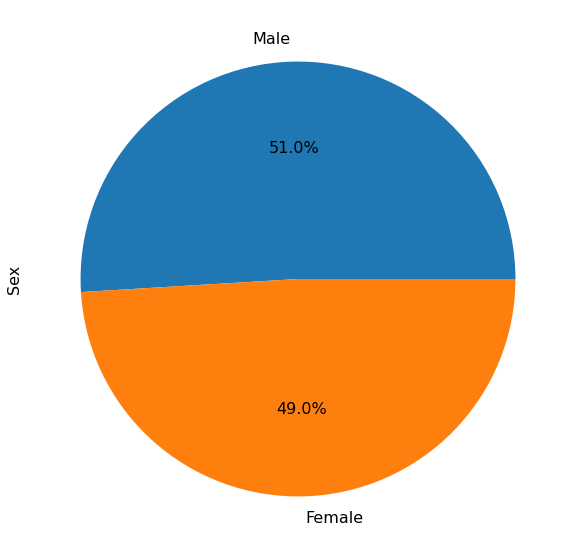

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
num_gender=clean_complete_data['Sex'].value_counts()

gender_df=pd.DataFrame(num_gender)

gr=gender_df.plot.pie(y='Sex', figsize=(10, 10), legend=False, autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x241170baef0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

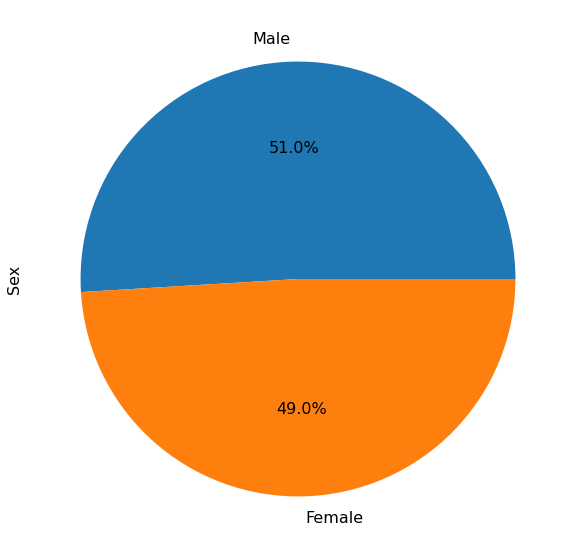

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
numbers=gender_df['Sex']
labels=['Male', 'Female']

plt.figure(figsize=(10,10))
plt.ylabel('Sex')
plt.pie(numbers, labels=labels, autopct="%1.1f%%" )

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#FROM: https://stackoverflow.com/questions/46665640/filtering-dataframe-based-on-latest-timestamp-for-each-unique-id
last_tp=clean_complete_data.groupby('Mouse ID', as_index=False).max()
last_tp=last_tp.rename(columns={'Timepoint':'Last Timepoint'})
last_tp.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#SEE OUITPUT OF ABOVE

,Mouse ID,Last Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
select_meds=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capo=[]
rami=[]
infu=[]
ceft=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volume
selected_mice=last_tp.loc[(last_tp['Drug Regimen']=='Capomulin') | (last_tp['Drug Regimen']=='Ramicane') | (last_tp['Drug Regimen']=='Infubinol') |(last_tp['Drug Regimen']=='Ceftamin')] 
#selected_mice


capo_mice=last_tp.loc[(last_tp['Drug Regimen']=='Capomulin')]
rami_mice=last_tp.loc[(last_tp['Drug Regimen']=='Ramicane')]
infu_mice=last_tp.loc[(last_tp['Drug Regimen']=='Infubinol')]
ceft_mice=last_tp.loc[(last_tp['Drug Regimen']=='Ceftamin')]

capo=capo_mice['Tumor Volume (mm3)']
rami=rami_mice['Tumor Volume (mm3)']
infu=infu_mice['Tumor Volume (mm3)']
ceft=ceft_mice['Tumor Volume (mm3)']

    # add subset 
      
    # Determine outliers using upper and lower bounds
capo_quart=capo.quantile([0.25,.5,.75])
capo_lowerq=capo_quart[0.25]
capo_upperq=capo_quart[.75]
capo_iqr=capo_upperq - capo_lowerq
capo_upper_bound=capo_upperq + (1.5*capo_iqr)
capo_lower_bound=capo_lowerq - (1.5*capo_iqr)
capo_sort=capo.sort_values()
print(f"Capomulin mice with Tumor Vol. below {capo_lower_bound} could be outliers.")
print(f"Capomulin mice with Tumor Vol above {capo_upper_bound} could be outliers.")
print(f"Capomulin Mice Tumor Vol. sorted in ascending order\n {capo_sort}")   

rami_quart=rami.quantile([0.25,.5,.75])
rami_lowerq=rami_quart[0.25]
rami_upperq=rami_quart[.75]
rami_iqr=rami_upperq - rami_lowerq
rami_upper_bound=rami_upperq + (1.5*rami_iqr)
rami_lower_bound=rami_lowerq - (1.5*rami_iqr)
rami_sort=rami.sort_values()
print(f"Ramicane mice with Tumor Vol. below {rami_lower_bound} could be outliers.")
print(f"Ramicane mice with Tumor Vol above {rami_upper_bound} could be outliers.")
print(f"Ramicane Mice Tumor Vol. sorted in ascending order\n {rami_sort}")

infu_quart=infu.quantile([0.25,.5,.75])
infu_lowerq=infu_quart[0.25]
infu_upperq=infu_quart[.75]
infu_iqr=infu_upperq - infu_lowerq
infu_upper_bound=infu_upperq + (1.5*infu_iqr)
infu_lower_bound=infu_lowerq - (1.5*infu_iqr)
infu_sort=infu.sort_values()
print(f"Infubinol mice with Tumor Vol. below {infu_lower_bound} could be outliers.")
print(f"Infubinol mice with Tumor Vol above {infu_upper_bound} could be outliers.")
print(f"Infubinol Mice Tumor Vol. sorted in ascending order\n {infu_sort}")

ceft_quart=ceft.quantile([0.25,.5,.75])
ceft_lowerq=ceft_quart[0.25]
ceft_upperq=ceft_quart[.75]
ceft_iqr=ceft_upperq - ceft_lowerq
ceft_upper_bound=ceft_upperq + (1.5*ceft_iqr)
ceft_lower_bound=ceft_lowerq - (1.5*ceft_iqr)
ceft_sort=ceft.sort_values()
print(f"Ceftamin mice with Tumor Vol. below {ceft_lower_bound} could be outliers.")
print(f"Ceftamin mice with Tumor Vol above {ceft_upper_bound} could be outliers.")
print(f"Ceftamin Mice Tumor Vol. sorted in ascending order\n {ceft_sort}")

#I SEE NO OUTLIERS IN ANY OF THE FOUR DRUG REGIMENS, DATA SETS

Capomulin mice with Tumor Vol. below 42.376491720000004 could be outliers.
Capomulin mice with Tumor Vol above 49.37251379999999 could be outliers.
Capomulin Mice Tumor Vol. sorted in ascending order
 239    45.000000
24     45.000000
61     45.000000
208    45.000000
180    45.000000
174    45.000000
121    45.000000
226    45.473753
83     45.595685
19     45.651331
204    45.704434
163    45.781746
220    45.893720
115    46.154737
64     46.304003
87     46.408361
124    46.414518
162    46.539206
183    46.749006
66     46.809225
192    47.212200
169    47.373423
80     47.685963
108    48.070452
85     48.158209
Name: Tumor Volume (mm3), dtype: float64
Ramicane mice with Tumor Vol. below 42.984251445 could be outliers.
Ramicane mice with Tumor Vol above 48.359580925 could be outliers.
Ramicane Mice Tumor Vol. sorted in ascending order
 244    45.000000
7      45.000000
10     45.000000
217    45.000000
177    45.000000
119    45.000000
45     45.000000
96     45.000000
76     45.

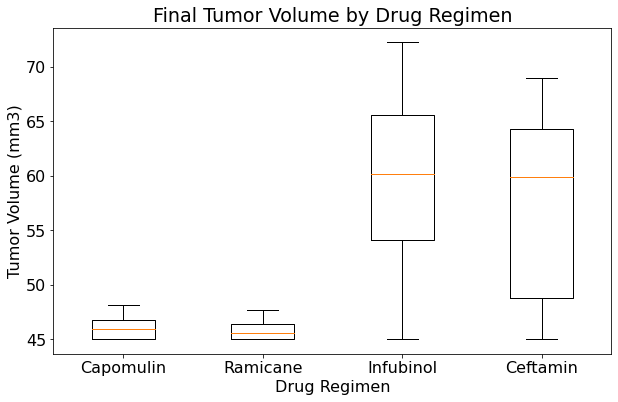

In [68]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#plt.figure(figsize=(2000,2000))
#selected_mice.boxplot(by='Drug Regimen', column=['Tumor Volume (mm3)', figsize=(10,10)])
#plt.ylabel('Tumor Volume (mm3)')
data_to_plot=[capo, rami, infu, ceft]
fig=plt.figure(1, figsize=(10,6))
ax = fig.add_subplot(111)
plt.boxplot(data_to_plot)
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()



## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
